In [1]:
import ilang_fs as il

In [2]:
il.setup_project('UN_GWHT', True)

In [3]:
data = il.raw_data_from_CSV('raw_data/ilang_UN_GWHT_data.csv', ',')

In [4]:
structured_data = il.structure_raw_data(data)

In [5]:
definition_network = il.make_rel_net(structured_data, 'Definiens', 'Definiendum')

In [6]:
# Print data to text files.
il.print_to_txt(data, 'UN_GWHT', 'data', save_to_project_dir = True)
il.print_to_txt(structured_data, 'UN_GWHT', 'structured_data', save_to_project_dir = True)
il.print_to_txt(definition_network.nodes(), 'UN_GWHT', 'definition_network_nodes', save_to_project_dir = True)
il.print_to_txt(definition_network.edges(), 'UN_GWHT', 'definition_network_edges', save_to_project_dir = True)

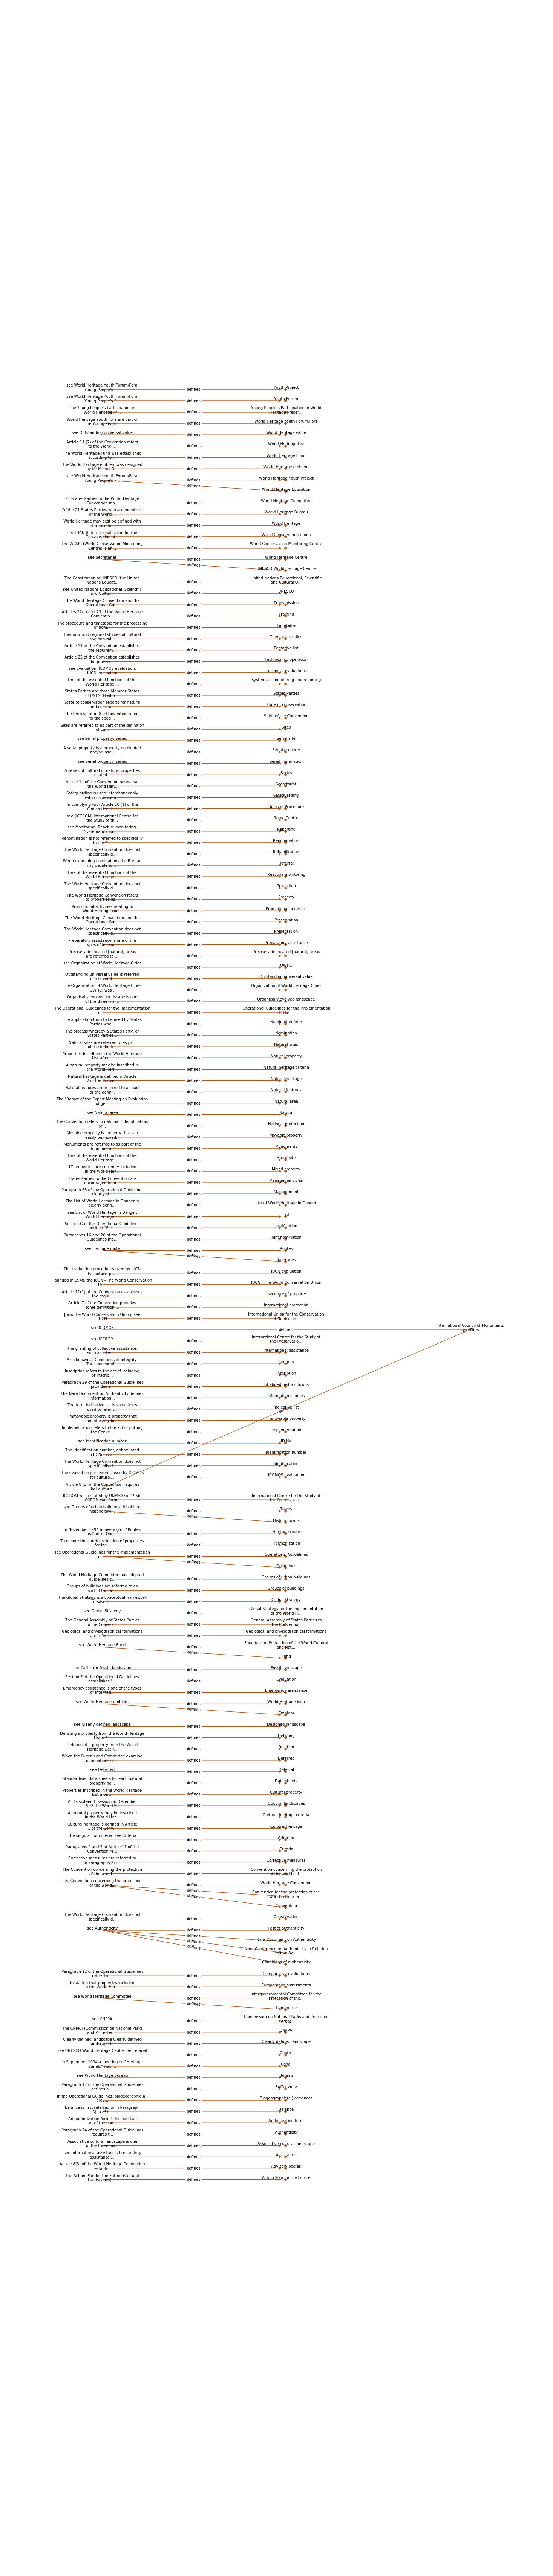

In [21]:
# Plot the Definition Network.
node_positions = il.pos_by_in_degrees(definition_network)
node_label_positions = il.offset_node_labels(node_positions, 0, 5)
node_label_content = il.format_node_labels(definition_network, structured_data, 'full_name', 30, 55)
colors = il.make_color_list(1)
colored_nodes = il.color_nodes(definition_network, colors, '#FFFFFF')
colored_edges = il.color_edge_by_target_node(definition_network, colored_nodes)
edge_label_content = dict()
for e in definition_network.edges(): edge_label_content[e] = 'defines'
# Plot low-res figure
figure = il.draw_rel_net(graph = definition_network, node_positions = node_positions, node_labels = node_label_content, node_label_positions = node_label_positions, node_colors = colored_nodes, edge_labels = edge_label_content, edge_colors = colored_edges, fig_w = 20, fig_h = 100, dpi_val = 90, fig_margin = 0.15, save_to_project_dir = True, image_description = 'definition_network')
# Plot hi-def figure.
# figure = il.draw_rel_net(graph = definition_network, node_positions = node_positions, node_labels = node_label_content, node_label_positions = node_label_positions, node_colors = colored_nodes, edge_labels = edge_label_content, edge_colors = colored_edges, fig_w = 10, fig_h = 10, dpi_val = 300, fig_margin = 0.15, save_to_project_dir = True, image_description = 'definition_network')

In [60]:
structured_data['n_1']

{'uid': 'n_1',
 'nickname': 'Action Plan for...',
 'full_name': 'Action Plan for the Future',
 'instance_of': 'Definiendum',
 'relationships': {('Definiendum',
   'Short Definiendum'): ('Action Plan for the Future', 'Action Plan'),
  ('Definiendum', 'Definiens'): ('Action Plan for the Future',
   'The Action Plan for the Future (Cultural Landscapes)\n        was prepared by the UNESCO "Expert Meeting on\n        Cultural Landscapes of Outstanding Universal Value" held in\n        Templin, Germany in October 1993 (see von Droste et al\n        1995: Annex 1).  The Action Plan outlines\n        recommendations concerning the provision of "Guidance to\n        States Parties on the Identification, Assessment, Nomination\n        and Management of Cultural Landscapes for Inclusion in the\n        World Heritage List" and on the preparation of a "Thematic\n        Study on Cultural Landscapes".  The Action Plan was\n        adopted by the World Heritage Committee at its\n        seventeenth

In [65]:
for n in definition_network.nodes():
    if definition_network.in_degree()[n] > 1: print(n, definition_network.in_degree()[n])

International Council of Monuments and Sites 2


In [95]:
# Print a table of nodes, by out degrees higher than threshold.
def tabulate_out_degrees(graph, out_degree_threshold, first_column_title, second_column_title):
    out_degrees_table = list()
    for n in graph.nodes():
        if graph.out_degree()[n] > out_degree_threshold: 
            out_degrees_table.append((n, graph.out_degree()[n]))
    out_degrees_table.sort()
    from tabulate import tabulate
    print(tabulate(out_degrees_table, headers = [first_column_title, second_column_title], tablefmt="pipe"))

In [98]:
tabulate_out_degrees(definition_network, 1, 'Definiens', 'Defines')

| Definiens                                                      |   Defines |
|:---------------------------------------------------------------|----------:|
| see Authenticity                                               |         4 |
| see Convention concerning the protection of the world cultural |         3 |
| and natural heritage                                           |           |
| see Groups of urban buildings, Inhabited historic              |         2 |
| towns                                                          |           |
| see Heritage route                                             |         2 |
| see Operational Guidelines for the Implementation of the World |         2 |
| Heritage Convention                                            |           |
| see Secretariat                                                |         2 |
| see World Heritage Committee                                   |         2 |
| see World Heritage Fund                           

In [99]:
def tabulate_in_degrees(graph, in_degree_threshold, first_column_title, second_column_title):
    in_degrees_table = list()
    for n in graph.nodes():
        if graph.in_degree()[n] > in_degree_threshold: 
            in_degrees_table.append((n, graph.in_degree()[n]))
    in_degrees_table.sort()
    from tabulate import tabulate
    print(tabulate(in_degrees_table, headers = [first_column_title, second_column_title], tablefmt="pipe"))

In [100]:
tabulate_in_degrees(definition_network, 1, 'Definiendum', 'Defined by')

| Definiendum                                  |   Defined by |
|:---------------------------------------------|-------------:|
| International Council of Monuments and Sites |            2 |


In [108]:
for n in structured_data:
    if structured_data[n]['full_name'] == 'see Authenticity': print(structured_data[n]['relationships']['Definiens', 'Definiendum'])

('see Authenticity', 'Conditions of authenticity')
('see Authenticity', 'Nara Conference on Authenticity in Relation to the World Heritage Convention')
('see Authenticity', 'Nara Document on Authenticity')
('see Authenticity', 'Test of authenticity')


In [111]:
# Return all relationships from strucured data, where the matching_attribute is equal to the matching_value.
def return_all_relationships(structured_data, matching_attribute, matching_value, rel_from, rel_to, first_column_title, second_column_title):
    output_table = list()
    for n in structured_data:
        if structured_data[n][matching_attribute] == matching_value:
            output_table.append(structured_data[n]['relationships'][rel_from, rel_to])
    from tabulate import tabulate
    print(tabulate(output_table, headers = [first_column_title, second_column_title], tablefmt="pipe"))

In [112]:
return_all_relationships(structured_data, 'full_name', 'see Authenticity', 'Definiens', 'Definiendum', 'Definiens', 'Defines')

| Definiens        | Defines                                                                      |
|:-----------------|:-----------------------------------------------------------------------------|
| see Authenticity | Conditions of authenticity                                                   |
| see Authenticity | Nara Conference on Authenticity in Relation to the World Heritage Convention |
| see Authenticity | Nara Document on Authenticity                                                |
| see Authenticity | Test of authenticity                                                         |


In [117]:
return_all_relationships(structured_data, 'full_name', 'see Convention concerning the protection of the world cultural\nand natural heritage', 'Definiens', 'Definiendum', 'Definiens', 'Defines')

| Definiens                                                      | Defines                                                                  |
|:---------------------------------------------------------------|:-------------------------------------------------------------------------|
| see Convention concerning the protection of the world cultural | Convention                                                               |
| and natural heritage                                           |                                                                          |
| see Convention concerning the protection of the world cultural | Convention for the protection of the world cultural and natural heritage |
| and natural heritage                                           |                                                                          |
| see Convention concerning the protection of the world cultural | World Heritage Convention                                                |
| and 

In [116]:
structured_data

{'n_1': {'uid': 'n_1',
  'nickname': 'Action Plan for...',
  'full_name': 'Action Plan for the Future',
  'instance_of': 'Definiendum',
  'relationships': {('Definiendum',
    'Short Definiendum'): ('Action Plan for the Future', 'Action Plan'),
   ('Definiendum', 'Definiens'): ('Action Plan for the Future',
    'The Action Plan for the Future (Cultural Landscapes)\n        was prepared by the UNESCO "Expert Meeting on\n        Cultural Landscapes of Outstanding Universal Value" held in\n        Templin, Germany in October 1993 (see von Droste et al\n        1995: Annex 1).  The Action Plan outlines\n        recommendations concerning the provision of "Guidance to\n        States Parties on the Identification, Assessment, Nomination\n        and Management of Cultural Landscapes for Inclusion in the\n        World Heritage List" and on the preparation of a "Thematic\n        Study on Cultural Landscapes".  The Action Plan was\n        adopted by the World Heritage Committee at its\n    